In [7]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load Data
# Replace with your actual file path or DataFrame source
df = pd.read_csv('../data/LosAngeles_Earthquake_Dataset.csv')

# 3. Dataset Overview
print("=== Data Info ===")
print(df.info())
print("\n=== Descriptive Statistics ===")
print(df.describe())
print("\n=== Class Distribution ===")
class_counts = df['class'].value_counts().sort_index()
print(class_counts)
print("\n=== Class Distribution (%) ===")
print((class_counts / len(df) * 100).round(2))


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22899 entries, 0 to 22898
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        22899 non-null  float64
 1   longitude                       22899 non-null  float64
 2   mag                             22899 non-null  float64
 3   clustering_coefficient_30_days  22899 non-null  float64
 4   std_mag_30_days                 22899 non-null  float64
 5   rolling_mean_depth_30_days      22899 non-null  float64
 6   earthquakes_last_30_days        22899 non-null  int64  
 7   b_value                         22899 non-null  float64
 8   b_value_increment_i_i2          22899 non-null  float64
 9   b_value_increment_i2_i4         22899 non-null  float64
 10  b_value_increment_i4_i6         22899 non-null  float64
 11  b_value_increment_i6_i8         22899 non-null  float64
 12  b_value_increm

In [8]:
df.isnull().sum()

latitude                          0
longitude                         0
mag                               0
clustering_coefficient_30_days    0
std_mag_30_days                   0
rolling_mean_depth_30_days        0
earthquakes_last_30_days          0
b_value                           0
b_value_increment_i_i2            0
b_value_increment_i2_i4           0
b_value_increment_i4_i6           0
b_value_increment_i6_i8           0
b_value_increment_i8_i10          0
max_mag_last_week                 0
eta                               0
delta_M                           0
elapsed_time                      0
coefficient_of_variation          0
dE1_2                             0
class                             0
dtype: int64

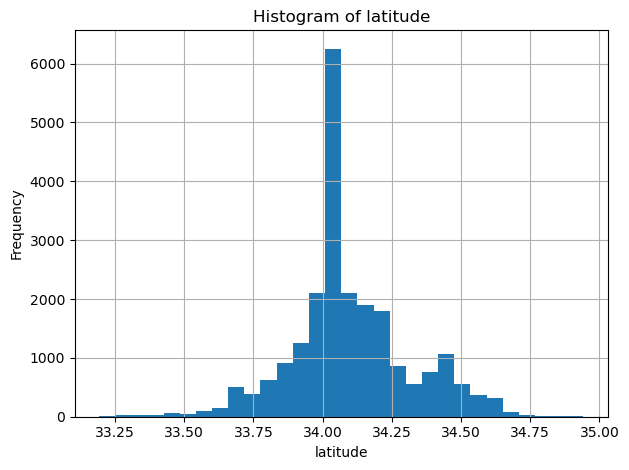

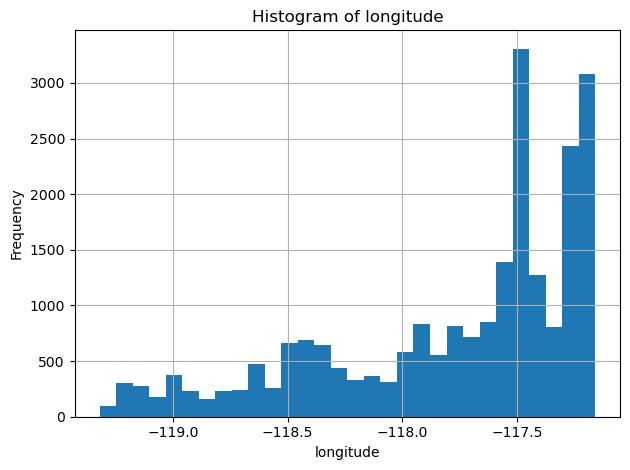

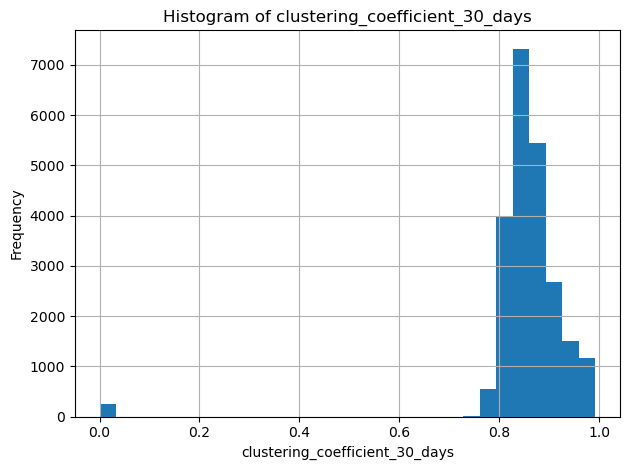

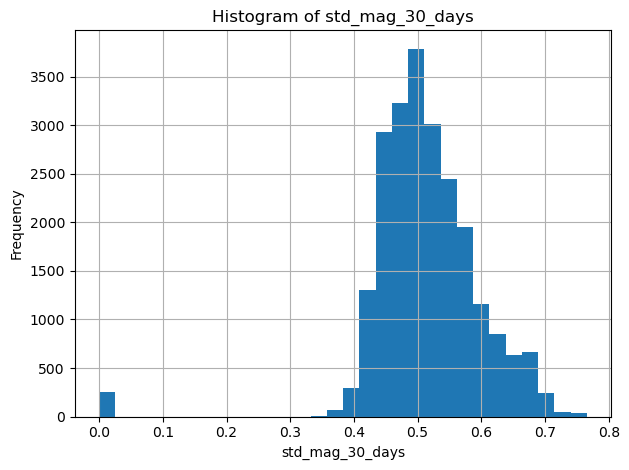

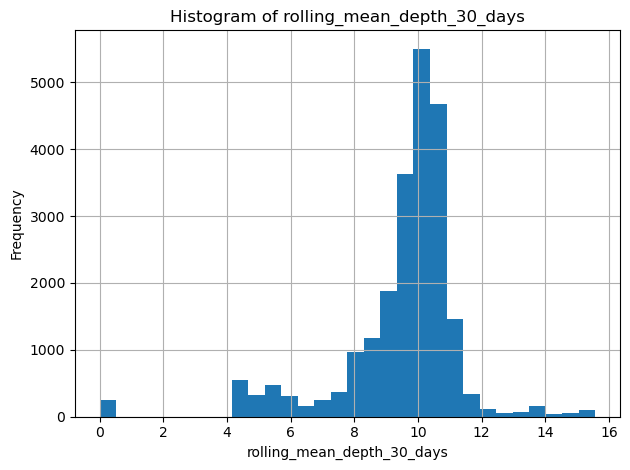

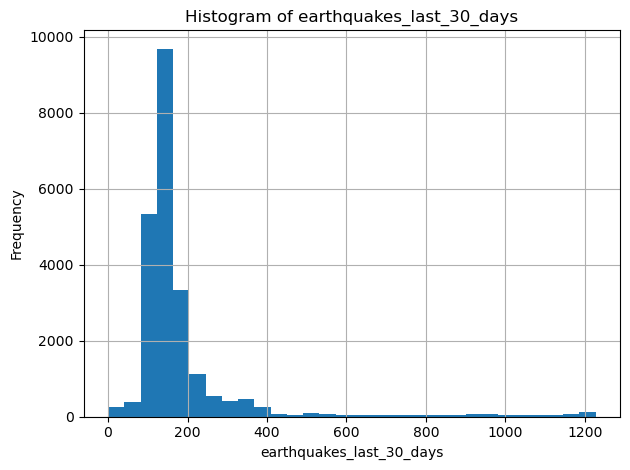

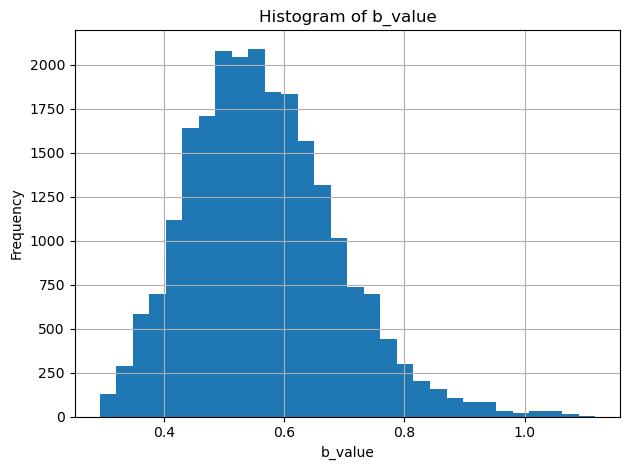

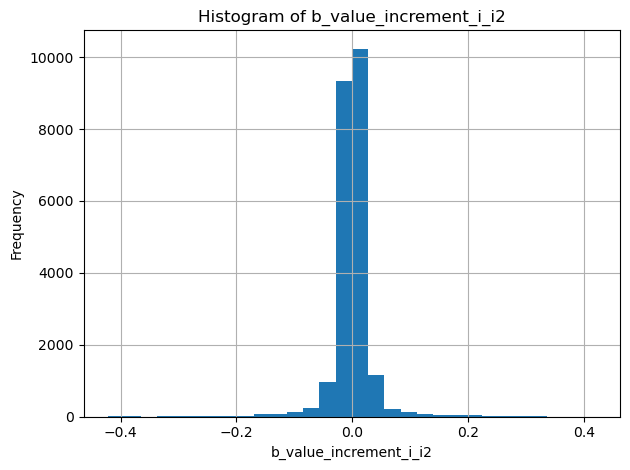

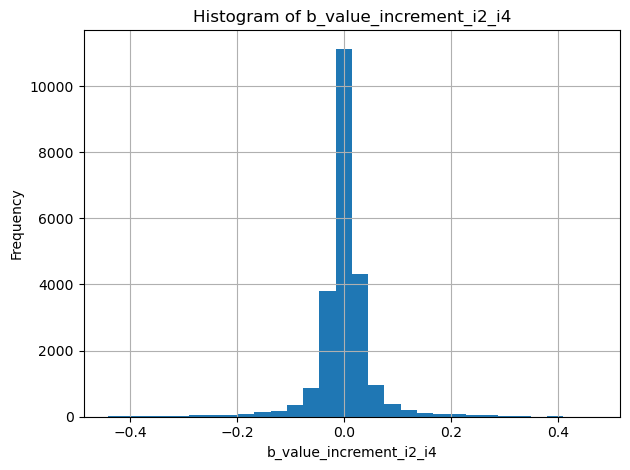

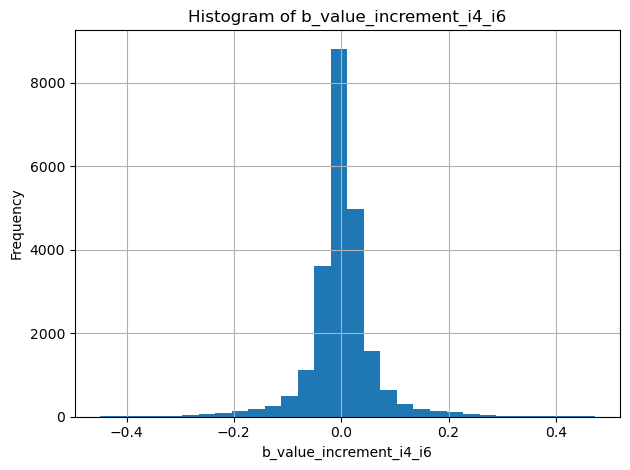

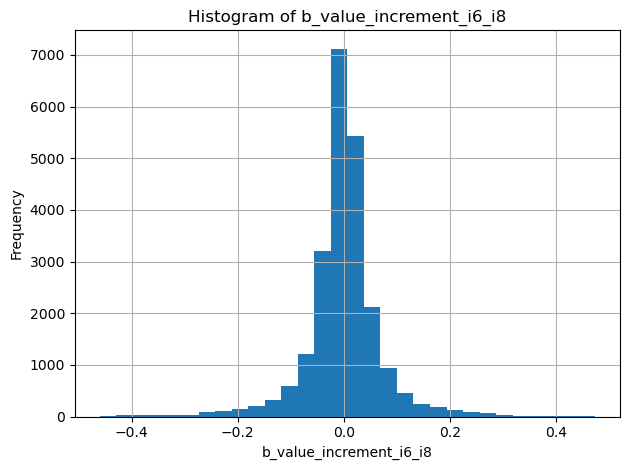

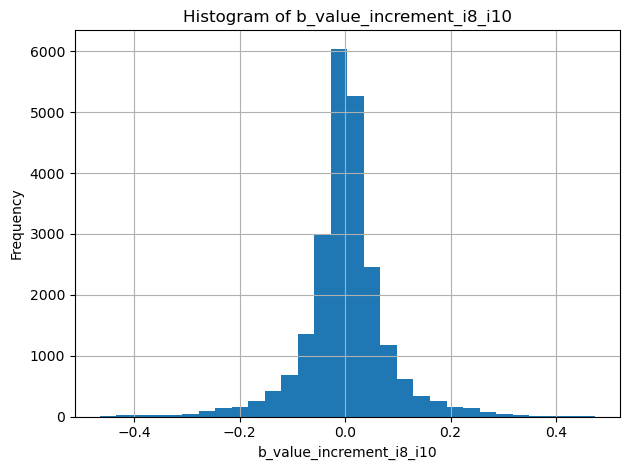

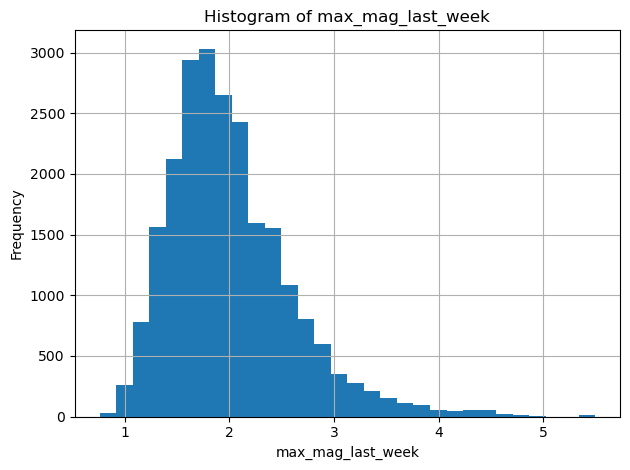

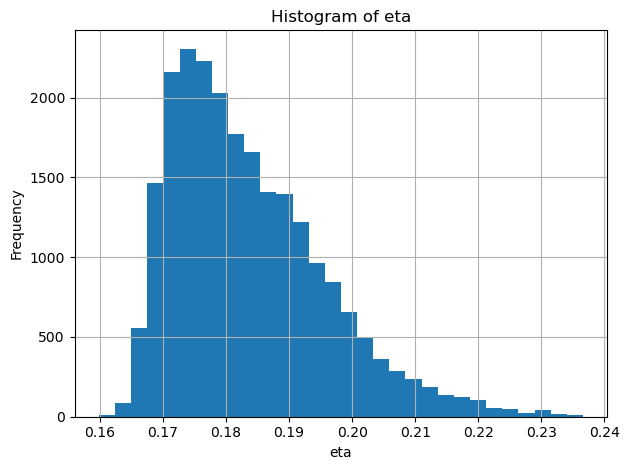

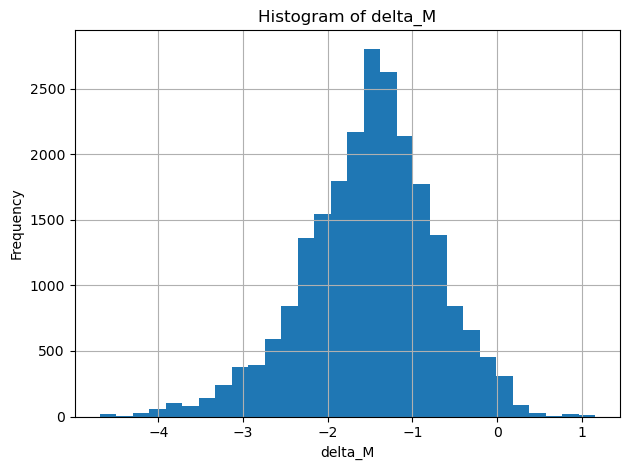

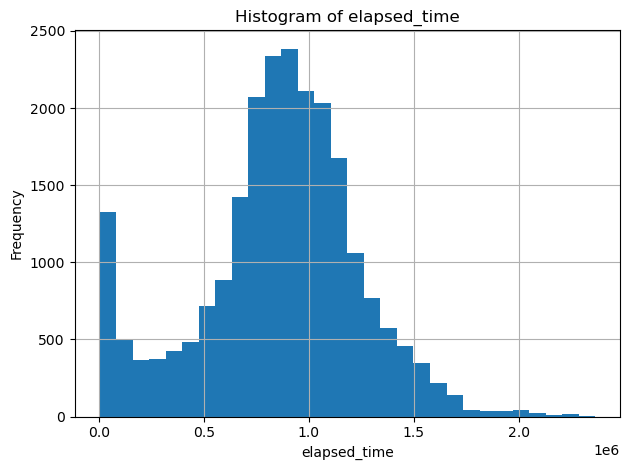

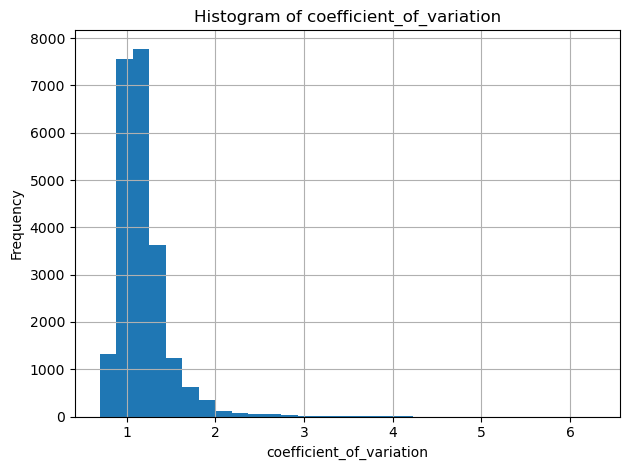

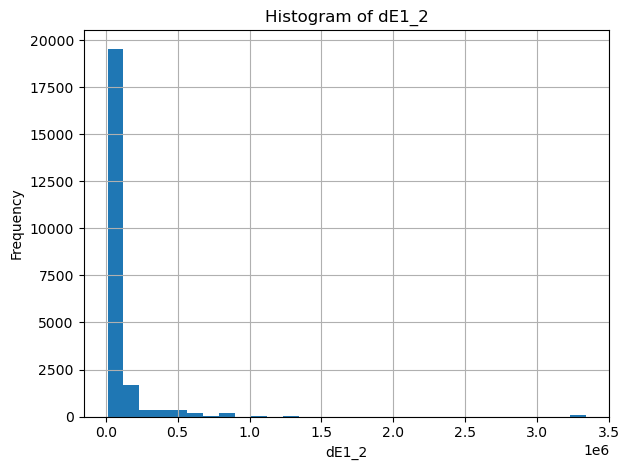

<Figure size 640x480 with 0 Axes>

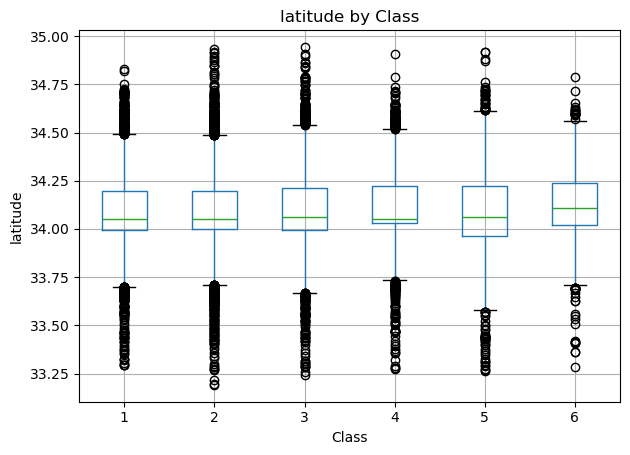

<Figure size 640x480 with 0 Axes>

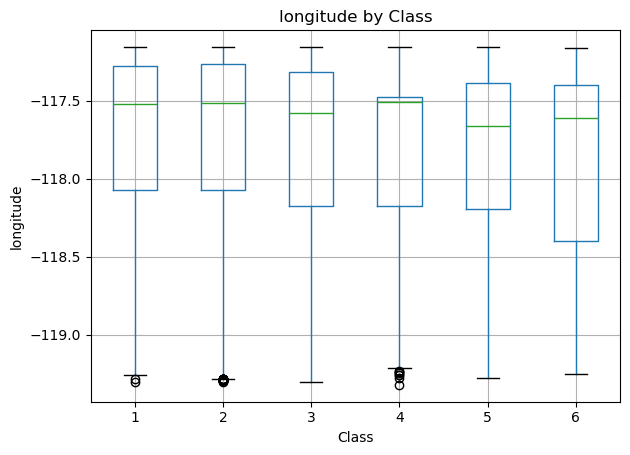

<Figure size 640x480 with 0 Axes>

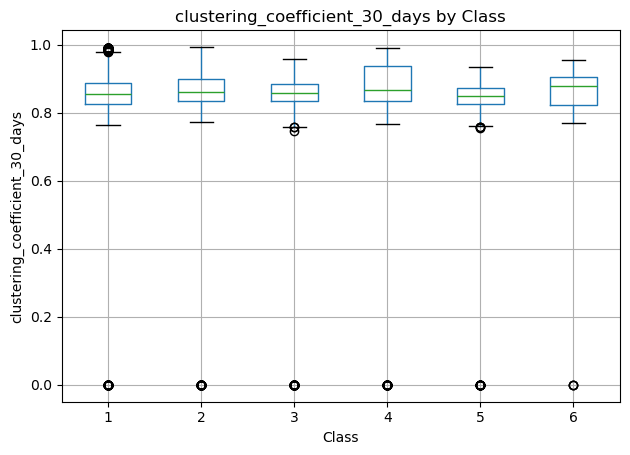

<Figure size 640x480 with 0 Axes>

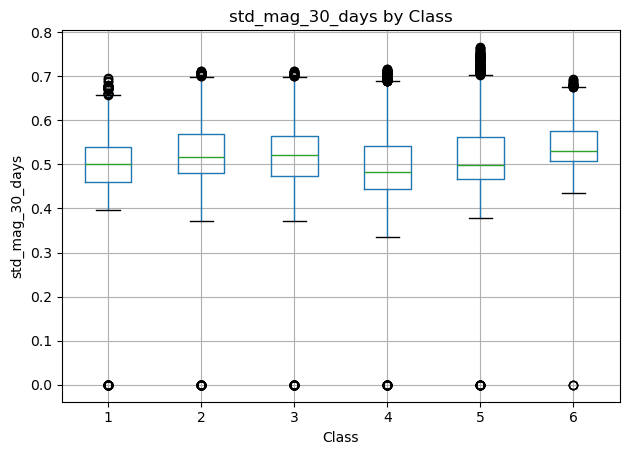

<Figure size 640x480 with 0 Axes>

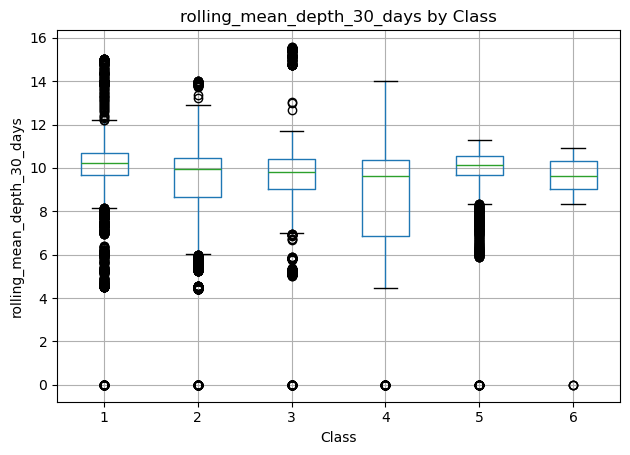

<Figure size 640x480 with 0 Axes>

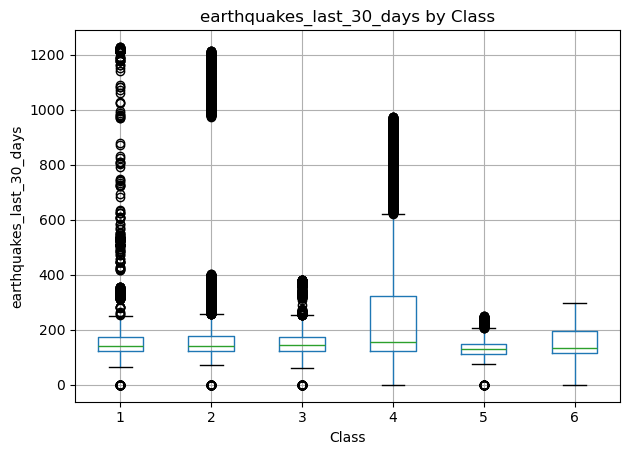

<Figure size 640x480 with 0 Axes>

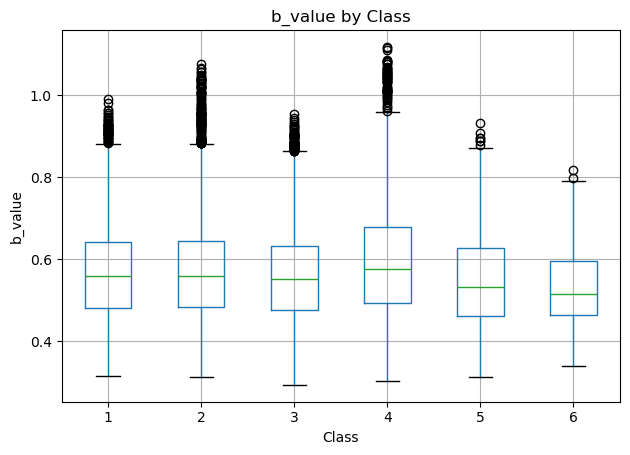

<Figure size 640x480 with 0 Axes>

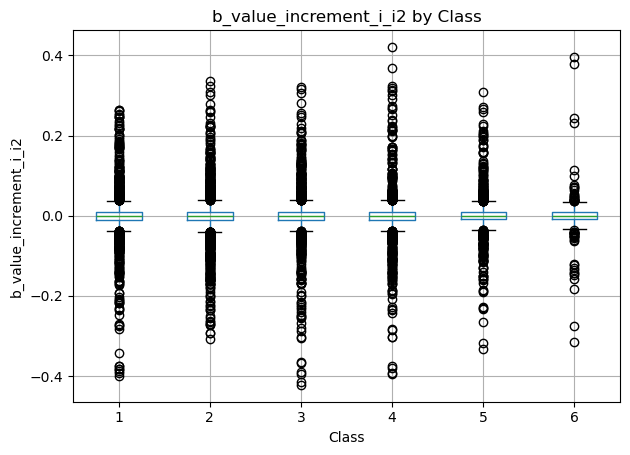

<Figure size 640x480 with 0 Axes>

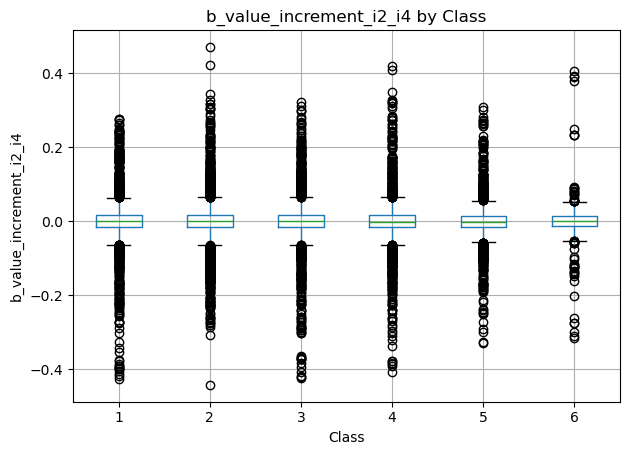

<Figure size 640x480 with 0 Axes>

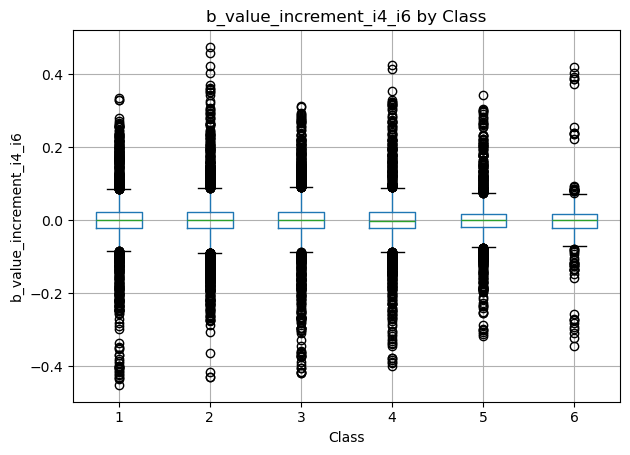

<Figure size 640x480 with 0 Axes>

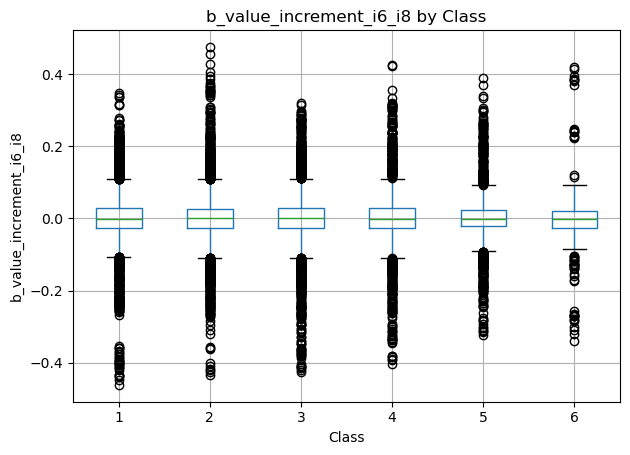

<Figure size 640x480 with 0 Axes>

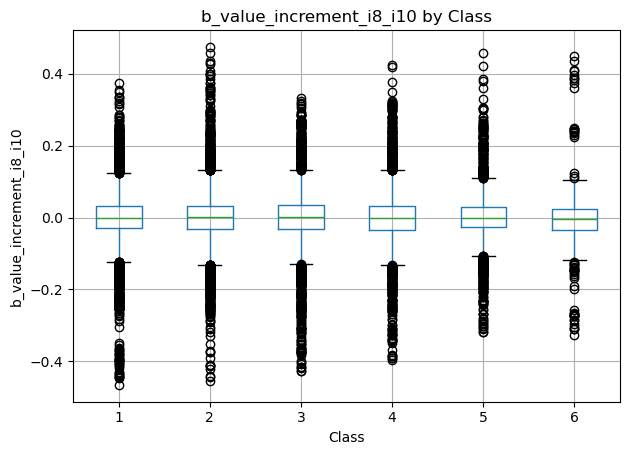

<Figure size 640x480 with 0 Axes>

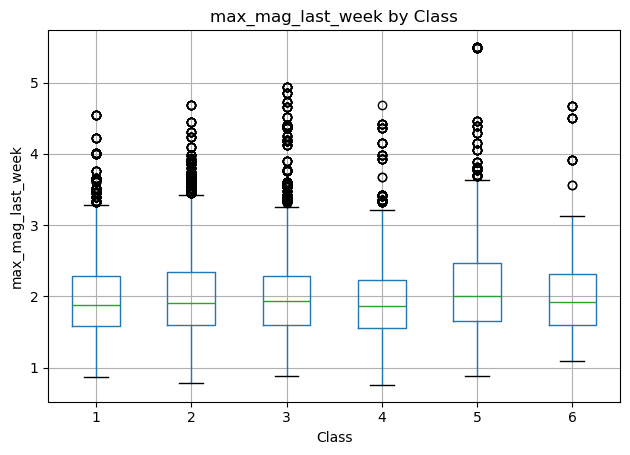

<Figure size 640x480 with 0 Axes>

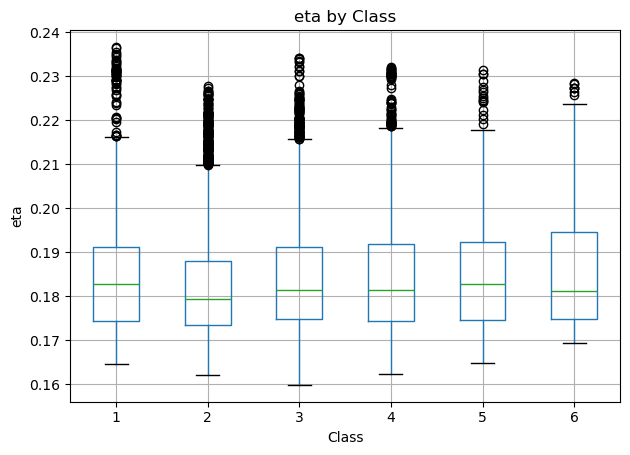

<Figure size 640x480 with 0 Axes>

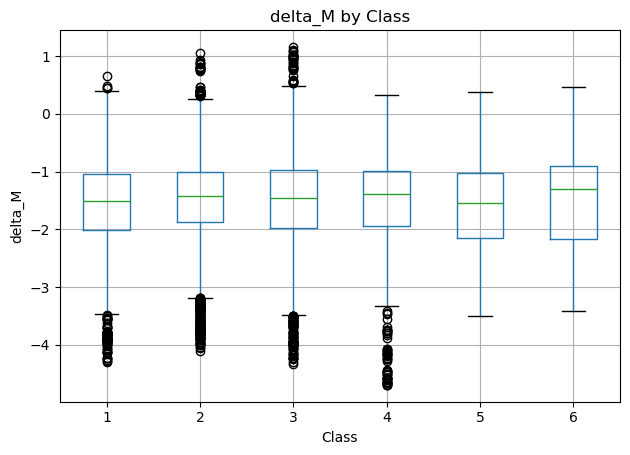

<Figure size 640x480 with 0 Axes>

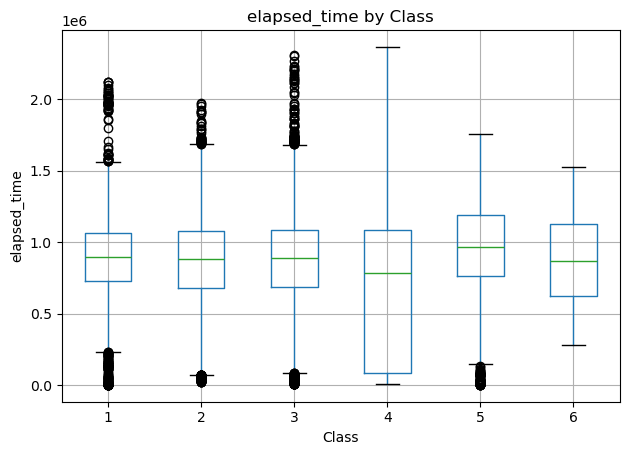

<Figure size 640x480 with 0 Axes>

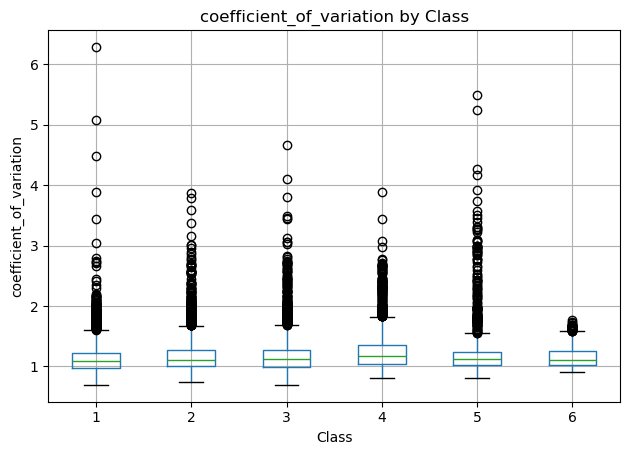

<Figure size 640x480 with 0 Axes>

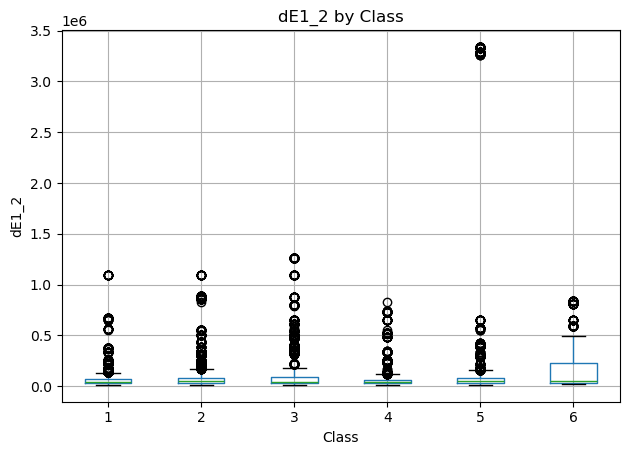

C:\Users\USER\AppData\Local\Temp\ipykernel_20072\1763401384.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


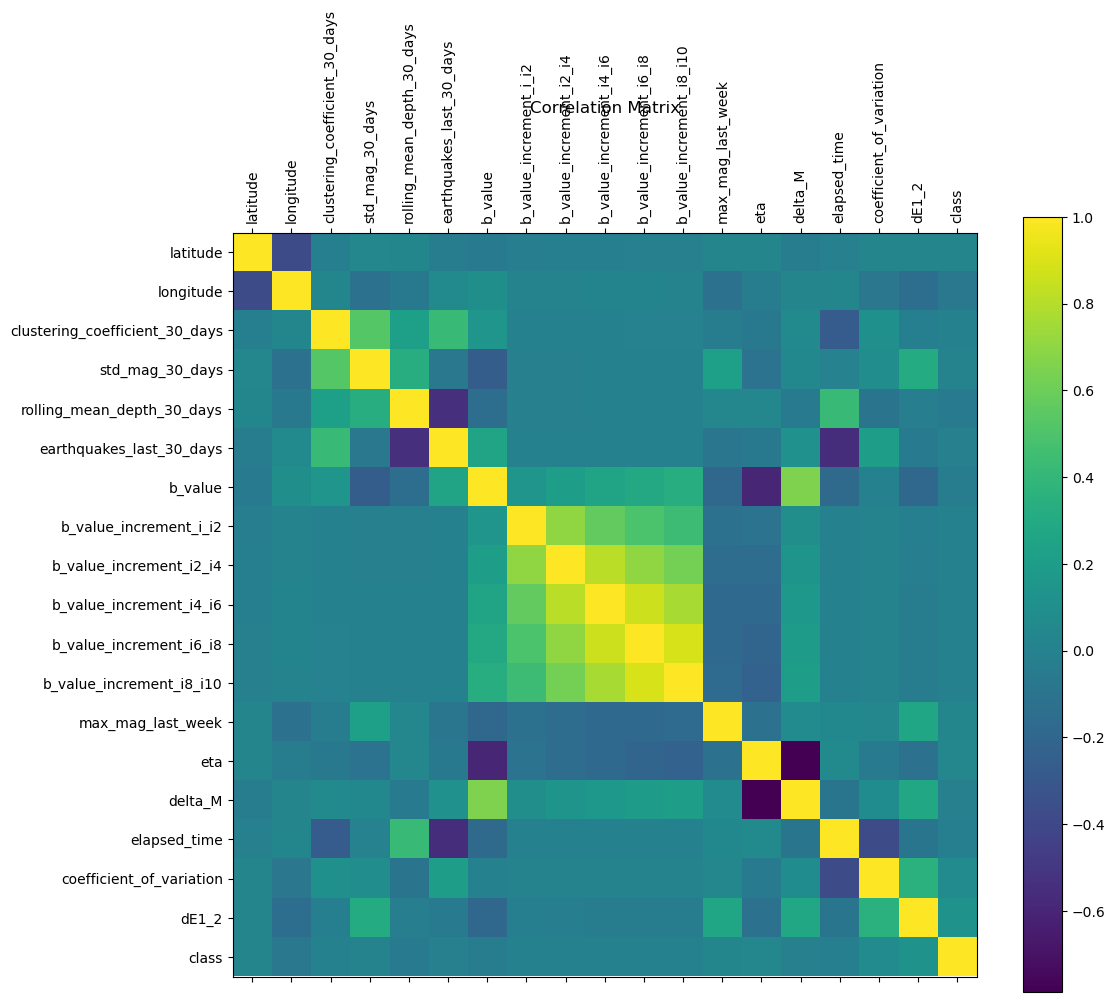

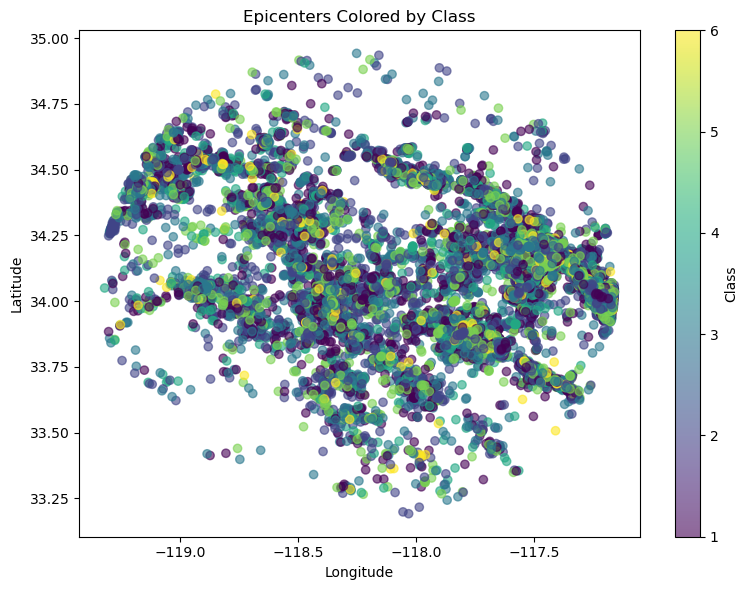

In [4]:

# 4. Univariate Distributions (Histograms)
numeric_cols = df.select_dtypes(include='number').columns.drop(['class', 'mag'], errors='ignore')
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 5. Feature vs. Class (Boxplots)
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col, by='class')
    plt.title(f'{col} by Class')
    plt.suptitle('')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# 6. Correlation Matrix
corr = df[numeric_cols.tolist() + ['class']].corr()
plt.figure(figsize=(12,10))
plt.matshow(corr, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix', y=1.15)
plt.tight_layout()
plt.show()

# 7. Spatial Scatter of Epicenters
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['class'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Class')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Epicenters Colored by Class')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Assuming your DataFrame is called df and 'class' is the target
X = df.drop(columns=['mag', 'class'])  # drop leakage and target
y = df['class']

# Apply RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# If you want it back as a DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)



In [10]:
# Optional: show a few rows
X_scaled_df.head()

,latitude,longitude,clustering_coefficient_30_days,std_mag_30_days,rolling_mean_depth_30_days,earthquakes_last_30_days,b_value,b_value_increment_i_i2,b_value_increment_i2_i4,b_value_increment_i4_i6,b_value_increment_i6_i8,b_value_increment_i8_i10,max_mag_last_week,eta,delta_M,elapsed_time,coefficient_of_variation,dE1_2
0,-1.537469,-0.005467,-1.618068,-0.622364,0.026769,-1.454545,0.871532,-0.827184,-0.533108,0.645765,0.854994,1.076692,-0.291667,-0.603497,0.271854,2.244511,-0.338972,0.342401
1,0.855761,-0.090099,-1.585077,-0.648646,-0.011041,-1.436364,0.949839,0.293280,-0.169006,0.517821,1.180555,1.283973,-0.291667,-0.598068,0.328555,1.989801,-0.385718,0.336914
2,1.905720,-1.809476,-1.653876,-0.387784,0.007427,-1.418182,0.908933,0.311001,-0.304718,-0.257225,0.627463,0.818663,-0.291667,-0.556851,0.299192,1.767930,-0.300197,0.337409
3,-0.321515,0.355538,-1.593682,-0.364460,0.046064,-1.400000,0.764425,-1.577371,-0.768778,-0.835816,-0.153617,0.520223,1.194444,-1.045284,0.190853,1.808055,-0.333085,0.479471
4,1.930700,-0.504353,-1.638172,-0.321774,0.024973,-1.381818,1.020747,0.941663,0.764224,0.196601,0.132741,0.817976,1.194444,-0.618883,0.378169,1.911399,-0.283143,0.333835


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, stratify=y, random_state=42
)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# === 🏋️‍♂️ TRAIN MODELS ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model



=== Logistic Regression ===
              precision    recall  f1-score   support

           1       0.31      0.36      0.33       942
           2       0.36      0.18      0.24      1269
           3       0.33      0.07      0.11      1040
           4       0.34      0.37      0.35       687
           5       0.19      0.37      0.26       527
           6       0.05      0.41      0.10       115

    accuracy                           0.25      4580
   macro avg       0.26      0.29      0.23      4580
weighted avg       0.31      0.25      0.25      4580



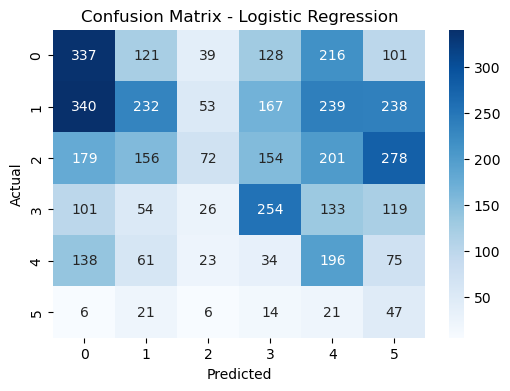


=== Random Forest ===
              precision    recall  f1-score   support

           1       0.97      0.98      0.98       942
           2       0.98      0.98      0.98      1269
           3       0.98      0.98      0.98      1040
           4       0.98      0.97      0.98       687
           5       0.99      0.98      0.98       527
           6       0.99      0.97      0.98       115

    accuracy                           0.98      4580
   macro avg       0.98      0.98      0.98      4580
weighted avg       0.98      0.98      0.98      4580



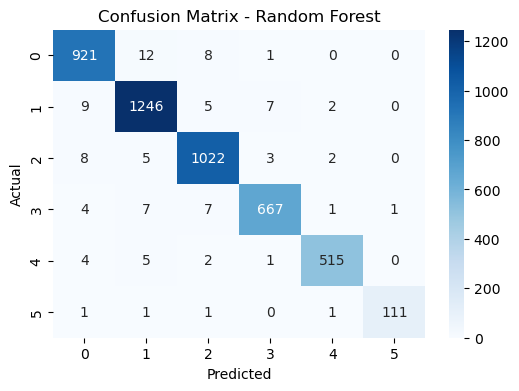


=== SVM ===
              precision    recall  f1-score   support

           1       0.37      0.53      0.44       942
           2       0.62      0.32      0.43      1269
           3       0.62      0.35      0.45      1040
           4       0.76      0.46      0.57       687
           5       0.27      0.58      0.37       527
           6       0.20      0.73      0.31       115

    accuracy                           0.43      4580
   macro avg       0.47      0.50      0.43      4580
weighted avg       0.54      0.43      0.45      4580



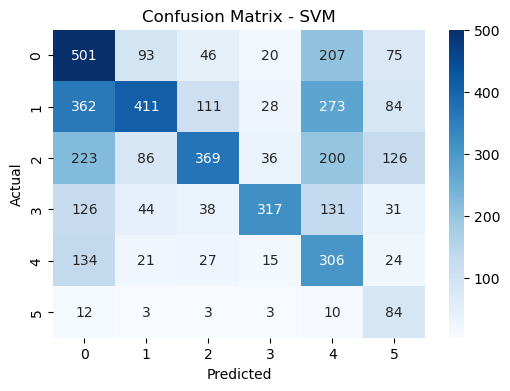


=== KNN ===
              precision    recall  f1-score   support

           1       0.62      0.77      0.69       942
           2       0.70      0.73      0.71      1269
           3       0.74      0.70      0.72      1040
           4       0.82      0.73      0.77       687
           5       0.76      0.57      0.65       527
           6       0.91      0.63      0.74       115

    accuracy                           0.71      4580
   macro avg       0.76      0.69      0.71      4580
weighted avg       0.72      0.71      0.71      4580



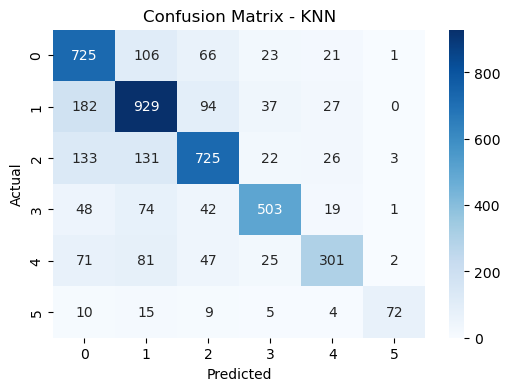

In [13]:

# === 📊 EVALUATE MODELS ===
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
metrics_summary = []

for name, model in trained_models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    try:
        y_prob = model.predict_proba(X_test)
        roc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    except:
        roc = None

    metrics_summary.append({
        'Model': name, 'Accuracy': acc, 'Precision': prec,
        'Recall': rec, 'F1-score': f1, 'ROC-AUC': roc
    })

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [14]:

# === 📋 SUMMARY TABLE ===
summary_df = pd.DataFrame(metrics_summary)
print("\n=== Model Comparison Summary ===")
print(summary_df.set_index('Model').round(3))



=== Model Comparison Summary ===
                     Accuracy  Precision  Recall  F1-score  ROC-AUC
Model                                                              
Logistic Regression     0.248      0.264   0.293     0.232    0.636
Random Forest           0.979      0.981   0.976     0.979    0.999
SVM                     0.434      0.473   0.497     0.428    0.787
KNN                     0.711      0.756   0.688     0.714    0.916


                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0  Logistic Regression     0.248      0.264   0.293     0.232    0.636
1        Random Forest     0.979      0.981   0.976     0.979    0.999
2                  SVM     0.434      0.473   0.497     0.428    0.787
3                  KNN     0.711      0.756   0.688     0.714    0.916
                 Model     Metric  Score
0  Logistic Regression   Accuracy  0.248
1        Random Forest   Accuracy  0.979
2                  SVM   Accuracy  0.434
3                  KNN   Accuracy  0.711
4  Logistic Regression  Precision  0.264


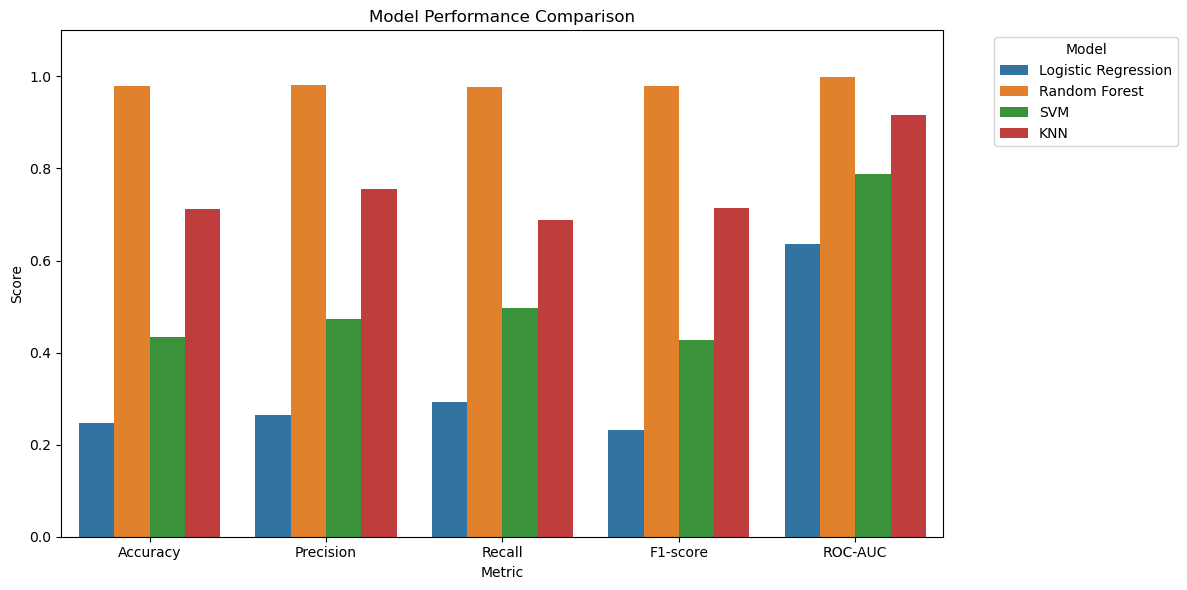

In [15]:

# === Model performance summary (from evaluation results) ===
performance_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy': [0.248, 0.979, 0.434, 0.711],
    'Precision': [0.264, 0.981, 0.473, 0.756],
    'Recall': [0.293, 0.976, 0.497, 0.688],
    'F1-score': [0.232, 0.979, 0.428, 0.714],
    'ROC-AUC': [0.636, 0.999, 0.787, 0.916]
}

# Convert to DataFrame
df_perf = pd.DataFrame(performance_data)
print(df_perf.head())

# Melt for seaborn plotting
df_melted = df_perf.melt(id_vars='Model', var_name='Metric', value_name='Score')
print(df_melted.head())

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
